In [108]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 250)

In [109]:
df_geo = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_geo_basic_clusters_shaps_final.csv')
df_time = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_time_based_features_full.csv')
df_hex_unique = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_unique_with_shares_spb.csv')
df_hex_total = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_total_with_shares_spb.csv')

In [110]:
df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((3892, 101), (3892, 63), (3892, 68), (3892, 68))

In [111]:
df_hex_total_and_unique = pd.merge(df_hex_unique, df_hex_total,
                                how='left', left_on='h3_9', right_on='h3_9')

In [112]:
avaible_hexes = df_hex_total_and_unique[(df_hex_total_and_unique['total_visits'] > 150)
                                       |(df_hex_total_and_unique['unique_visits'] > 50)].h3_9.to_list()
len(avaible_hexes)

1335

In [113]:
df_hex_total = df_hex_total[df_hex_total['h3_9'].isin(avaible_hexes)]
df_hex_unique = df_hex_unique[df_hex_unique['h3_9'].isin(avaible_hexes)]
df_time = df_time[df_time['h3_9'].isin(avaible_hexes)]
df_geo = df_geo[df_geo['h3_9'].isin(avaible_hexes)]

df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((1335, 101), (1335, 63), (1335, 68), (1335, 68))

In [114]:
df_geo = df_geo.drop(columns=['name'])

In [115]:
df_geo.head(3)

h3_9  cian_total_listing_count_including_hex_3hn  \
0  8911060006bffff                                         8.0   
1  89110600077ffff                                       136.0   
2  89110600113ffff                                        10.0   

   cian_total_area_including_hex_3hn  cian_median_area_including_hex_3hn  \
0                            12062.9                             1263.33   
1                           237533.7                              951.95   
2                            16975.0                              746.00   

   cian_avg_area_including_hex_3hn  \
0                         1287.046   
1                         1292.975   
2                          944.250   

   cian_median_price_per_m2_including_hex_3hn  \
0                                      1000.0   
1                                       750.0   
2                                       980.0   

   cian_avg_price_per_m2_including_hex_3hn  spb_trans_amount_unqiue_vehicles  \
0                                  937.210                               1.0   
1                                  895.748                               0.0   
2                                 1390.000                               0.0   

   spb_trans_unique_vehicle_stops  spb_trans_unique_stops  \
0                             1.0                     1.0   
1                             0.0                     0.0   
2                             0.0                     0.0   

   spb_trans_bus_stop_counter  spb_trans_tram_stop_counter  \
0                         1.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   

   spb_trans_trolleybus_stop_counter  total_fit_clubs  \
0                                0.0              0.0   
1                                0.0              0.0   
2                                0.0              4.0   

   total_fit_clubs_neighbour_2_hn  metro_count  total_metro_neighbour_5_hn  \
0                             0.0          0.0                         0.0   
1                             0.0          0.0                         0.0   
2                             4.0          0.0                         0.0   

   population_sum  total_population_neighbour_2_hn  category_auto_count_2_hn  \
0             0.0                              0.0                     109.0   
1             0.0                              0.0                      91.0   
2             0.0                              0.0                     239.0   

   category_security_count_2_hn  category_business_count_2_hn  \
0                          15.0                          11.0   
1                          12.0                           7.0   
2                          41.0                          53.0   

   category_government_count_2_hn  category_pets_count_2_hn  \
0                             2.0                      11.0   
1                             1.0                       2.0   
2                             0.0                       3.0   

   category_home_and_interior_count_2_hn  category_food_and_drinks_count_2_hn  \
0                                   17.0                                 43.0   
1                                    0.0                                 32.0   
2                                   31.0                                156.0   

   category_computers_and_internet_count_2_hn  \
0                                         8.0   
1                                        12.0   
2                                        40.0   

   category_beauty_and_health_count_2_hn  category_culture_and_art_count_2_hn  \
0                                    0.0                                  1.0   
1                                    0.0                                  1.0   
2                                   95.0                                 17.0   

   category_stores_count_2_hn  category_medicine_and_ph

In [116]:
df_model_short = pd.merge(df_hex_unique, df_time,
                                how='left', left_on='h3_9', right_on='h3_9')

In [117]:
df_model_short = pd.merge(df_model_short, df_geo,
                                how='left', left_on='h3_9', right_on='h3_9')

In [118]:
df_model_short.shape

(1335, 229)

In [119]:
df_model_short.head(3)

h3_9  unique_visits  car_owners_unique  carsharing_user_unique  \
0  8911060006bffff             98                 50                      12   
1  89110600077ffff             99                 53                      27   
2  89110600113ffff            144                 79                      31   

   not_citizen_rf_unique  healthy_food_inter_unique  \
0                     44                          3   
1                     48                          1   
2                     80                          4   

   public_trnsprt_user_unique  pharmacies_inter_unique  \
0                           4                       38   
1                           3                       42   
2                           5                       66   

   beauty_salon_inter_unique  elite_sports_inter_unique  \
0                          4                          1   
1                          1                          3   
2                          6                          1   

   sprtswr_ftwr_inter_unique  sprt_good_inter_unique  trvl_rus_unique  \
0                          1                       3               22   
1                          1                      10               27   
2                          0                      14               21   

   trvl_abrd_unique  sprt_fit_inter_unique  hunting_fishing_inter_unique  \
0                 4                      2                             2   
1                 8                      4                             5   
2                 3                      7                             4   

   fashion_inter_unique  coffee_inter_unique  med_serv_inter_unique  \
0                     5                    6                     14   
1                     4                   13                     17   
2                    17                   20                     32   

   education_inter_unique  delivery_inter_unique  markets_inter_unique  \
0                       8                     22                    41   
1                      15                     26                    48   
2                      28                     34                    66   

   no_children_unique  age_20_unique  age_20_30_unique  age_30_40_unique  \
0                  90              0                12                29   
1                  83              1                12                26   
2                 118              1                10                51   

   age_40_60_unique  age_60_unique  male_unique  female_unique  \
0                41             14           64             34   
1                39             12           69             30   
2                62             13           92             52   

   salary_1_unique  salary_2_unique  salary_3_unique  salary_4_unique  \
0               29               15               12               13   
1               20               13               20               18   
2               42               26               22               20   

   salary_5_unique  car_owners_unique_share  carsharing_user_unique_share  \
0               16                 0.510204                      0.122449   
1               16                 0.535354                      0.272727   
2               19                 0.548611                      0.215278   

   not_citizen_rf_unique_share  healthy_food_inter_unique_share  \
0                     0.448980                         0.030612   
1                     0.484848                         0.010101   
2                     0.555556                         0.027778   

   public_trnsprt_user_unique_share  pharmacies_inter_unique_share  \
0                          0.040816                       0.387755   
1                          0.030303                       0.424242   
2                          0.034722                       0.458333   

   beauty_salon_inter_unique_share  elite_sports_inter_unique_share  \
0                         0.0

In [120]:
df_hex_unique.head(3)

h3_9  unique_visits  car_owners_unique  carsharing_user_unique  \
0  8911060006bffff             98                 50                      12   
1  89110600077ffff             99                 53                      27   
2  89110600113ffff            144                 79                      31   

   not_citizen_rf_unique  healthy_food_inter_unique  \
0                     44                          3   
1                     48                          1   
2                     80                          4   

   public_trnsprt_user_unique  pharmacies_inter_unique  \
0                           4                       38   
1                           3                       42   
2                           5                       66   

   beauty_salon_inter_unique  elite_sports_inter_unique  \
0                          4                          1   
1                          1                          3   
2                          6                          1   

   sprtswr_ftwr_inter_unique  sprt_good_inter_unique  trvl_rus_unique  \
0                          1                       3               22   
1                          1                      10               27   
2                          0                      14               21   

   trvl_abrd_unique  sprt_fit_inter_unique  hunting_fishing_inter_unique  \
0                 4                      2                             2   
1                 8                      4                             5   
2                 3                      7                             4   

   fashion_inter_unique  coffee_inter_unique  med_serv_inter_unique  \
0                     5                    6                     14   
1                     4                   13                     17   
2                    17                   20                     32   

   education_inter_unique  delivery_inter_unique  markets_inter_unique  \
0                       8                     22                    41   
1                      15                     26                    48   
2                      28                     34                    66   

   no_children_unique  age_20_unique  age_20_30_unique  age_30_40_unique  \
0                  90              0                12                29   
1                  83              1                12                26   
2                 118              1                10                51   

   age_40_60_unique  age_60_unique  male_unique  female_unique  \
0                41             14           64             34   
1                39             12           69             30   
2                62             13           92             52   

   salary_1_unique  salary_2_unique  salary_3_unique  salary_4_unique  \
0               29               15               12               13   
1               20               13               20               18   
2               42               26               22               20   

   salary_5_unique  car_owners_unique_share  carsharing_user_unique_share  \
0               16                 0.510204                      0.122449   
1               16                 0.535354                      0.272727   
2               19                 0.548611                      0.215278   

   not_citizen_rf_unique_share  healthy_food_inter_unique_share  \
0                     0.448980                         0.030612   
1                     0.484848                         0.010101   
2                     0.555556                         0.027778   

   public_trnsprt_user_unique_share  pharmacies_inter_unique_share  \
0                          0.040816                       0.387755   
1                          0.030303                       0.424242   
2                          0.034722                       0.458333   

   beauty_salon_inter_unique_share  elite_sports_inter_unique_share  \
0                         0.0

In [121]:
df_time.head(3)

h3_9  avg_duration_hrs  median_duration_hrs  weekday_visits  \
0  8911060006bffff          4.722789                 2.23             108   
1  89110600077ffff          3.709160                 1.81             186   
2  89110600113ffff          4.214955                 1.72             213   

   weekend_visits  Stay0_05h  Stay05_1h  Stay1_3h  Stay3_6h  Stay6_9h  \
0              39          0         10        76        19        15   
1              64          0         22       141        44        17   
2             120          0         28       229        39        18   

   Stay9_15h  Stay15_20h  Stay20_plus  Friday  Monday  Saturday  Sunday  \
0         21           2            4      37      25        24      15   
1         16           9            1      36      54        31      33   
2          9           7            3      46      61        62      58   

   Thursday  Tuesday  Wednesday  day  evening  morning  night  \
0        12       21         13   47       40       28     32   
1        34       36         26  115       54       36     45   
2        36       33         37  148       51       84     50   

   weekday_visits_share  weekend_visits_share  Stay0_05h_share  \
0              0.734694              0.265306              0.0   
1              0.744000              0.256000              0.0   
2              0.639640              0.360360              0.0   

   Stay05_1h_share  Stay1_3h_share  Stay3_6h_share  Stay6_9h_share  \
0         0.068027        0.517007        0.129252        0.102041   
1         0.088000        0.564000        0.176000        0.068000   
2         0.084084        0.687688        0.117117        0.054054   

   Stay9_15h_share  Stay15_20h_share  Stay20_plus_share  Friday_share  \
0         0.142857          0.013605           0.027211      0.251701   
1         0.064000          0.036000           0.004000      0.144000   
2         0.027027          0.021021           0.009009      0.138138   

   Monday_share  Saturday_share  Sunday_share  Thursday_share  Tuesday_share  \
0      0.170068        0.163265      0.102041        0.081633       0.142857   
1      0.216000        0.124000      0.132000        0.136000       0.144000   
2      0.183183        0.186186      0.174174        0.108108       0.099099   

   Wednesday_share  day_share  evening_share  morning_share  night_share  \
0         0.088435   0.319728       0.272109       0.190476     0.217687   
1         0.104000   0.460000       0.216000       0.144000     0.180000   
2         0.111111   0.444444       0.153153       0.252252     0.150150   

   avg_duration_hrs_per_unique  median_duration_hrs_per_unique  \
0                     3.710017                            1.70   
1                     2.982734                            1.39   
2                     5.845619                            1.50   

   Stay0_05h_per_unique  Stay05_1h_per_unique  Stay1_3h_per_unique  \
0                     0                     8                   57   
1                     0                    18                   55   
2                     0                    20                   93   

   Stay3_6h_per_unique  Stay6_9h_per_unique  Stay9_15h_per_unique  \
0                   13                    9                     9   
1                   13                    6                     4   
2                   14                    7                     5   

   Stay15_20h_per_unique  Stay20_plus_per_unique  \
0                      1                       1   
1                      3                       0   
2                      3                       2   

   Stay0_05h_per_unique_share_per_unique  \
0                                    0.0   
1                                    0.0   
2                                    0.0   

   Stay05_1h_per_unique_share_per_unique  \
0                               0.081633   
1                               0.181818   
2                               0.138889   


## Альтернативный вариант с более чистыми датасетами

In [122]:
df_hex_unique_short = df_hex_unique.drop(columns=['car_owners_unique', 'carsharing_user_unique',
       'not_citizen_rf_unique', 'healthy_food_inter_unique',
       'public_trnsprt_user_unique', 'pharmacies_inter_unique',
       'beauty_salon_inter_unique', 'elite_sports_inter_unique',
       'sprtswr_ftwr_inter_unique', 'sprt_good_inter_unique',
       'trvl_rus_unique', 'trvl_abrd_unique', 'sprt_fit_inter_unique',
       'hunting_fishing_inter_unique', 'fashion_inter_unique',
       'coffee_inter_unique', 'med_serv_inter_unique',
       'education_inter_unique', 'delivery_inter_unique',
       'markets_inter_unique', 'no_children_unique', 'age_20_unique',
       'age_20_30_unique', 'age_30_40_unique', 'age_40_60_unique',
       'age_60_unique', 'male_unique', 'female_unique', 'salary_1_unique',
       'salary_2_unique', 'salary_3_unique', 'salary_4_unique',
       'salary_5_unique', 'car_owners_unique_share',
       'carsharing_user_unique_share', 'not_citizen_rf_unique_share',
       'healthy_food_inter_unique_share', 'public_trnsprt_user_unique_share',
       'pharmacies_inter_unique_share', 'beauty_salon_inter_unique_share',
                                                 'trvl_rus_unique_share',
       'trvl_abrd_unique_share', 'sprt_fit_inter_unique_share',
       'hunting_fishing_inter_unique_share', 'fashion_inter_unique_share',
       'coffee_inter_unique_share', 'med_serv_inter_unique_share',
                                                 'elite_sports_inter_unique_share',
       'sprtswr_ftwr_inter_unique_share', 'sprt_good_inter_unique_share',
       'education_inter_unique_share', 'delivery_inter_unique_share',
       'markets_inter_unique_share', 'no_children_unique_share'])

In [123]:
df_hex_unique_short.columns

Index(['h3_9', 'unique_visits', 'age_20_unique_share',
       'age_20_30_unique_share', 'age_30_40_unique_share',
       'age_40_60_unique_share', 'age_60_unique_share', 'male_unique_share',
       'female_unique_share', 'salary_1_unique_share', 'salary_2_unique_share',
       'salary_3_unique_share', 'salary_4_unique_share',
       'salary_5_unique_share'],
      dtype='object')

In [124]:
df_time_short = df_time.drop(columns=['weekday_visits',
       'weekend_visits', 'Stay0_05h', 'Stay05_1h', 'Stay1_3h', 'Stay3_6h',
       'Stay6_9h', 'Stay9_15h', 'Stay15_20h', 'Stay20_plus', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'day', 'evening', 'morning', 'night',  'Stay0_05h_per_unique',
       'Stay05_1h_per_unique', 'Stay1_3h_per_unique', 'Stay3_6h_per_unique',
       'Stay6_9h_per_unique', 'Stay9_15h_per_unique', 'Stay15_20h_per_unique',
       'Stay20_plus_per_unique' ])

In [132]:
df_time_short.columns

Index(['h3_9', 'avg_duration_hrs', 'median_duration_hrs',
       'weekday_visits_share', 'weekend_visits_share', 'Stay0_05h_share',
       'Stay05_1h_share', 'Stay1_3h_share', 'Stay3_6h_share', 'Stay6_9h_share',
       'Stay9_15h_share', 'Stay15_20h_share', 'Stay20_plus_share',
       'Friday_share', 'Monday_share', 'Saturday_share', 'Sunday_share',
       'Thursday_share', 'Tuesday_share', 'Wednesday_share', 'day_share',
       'evening_share', 'morning_share', 'night_share',
       'avg_duration_hrs_per_unique', 'median_duration_hrs_per_unique',
       'Stay0_05h_per_unique_share_per_unique',
       'Stay05_1h_per_unique_share_per_unique',
       'Stay1_3h_per_unique_share_per_unique',
       'Stay3_6h_per_unique_share_per_unique',
       'Stay6_9h_per_unique_share_per_unique',
       'Stay9_15h_per_unique_share_per_unique',
       'Stay15_20h_per_unique_share_per_unique',
       'Stay20_plus_per_unique_share_per_unique'],
      dtype='object')

In [151]:
df_geo.columns

Index(['h3_9', 'cian_total_listing_count_including_hex_3hn',
       'cian_total_area_including_hex_3hn',
       'cian_median_area_including_hex_3hn', 'cian_avg_area_including_hex_3hn',
       'cian_median_price_per_m2_including_hex_3hn',
       'cian_avg_price_per_m2_including_hex_3hn',
       'spb_trans_amount_unqiue_vehicles', 'spb_trans_unique_vehicle_stops',
       'spb_trans_unique_stops', 'spb_trans_bus_stop_counter',
       'spb_trans_tram_stop_counter', 'spb_trans_trolleybus_stop_counter',
       'total_fit_clubs', 'total_fit_clubs_neighbour_2_hn', 'metro_count',
       'total_metro_neighbour_5_hn', 'population_sum',
       'total_population_neighbour_2_hn', 'category_auto_count_2_hn',
       'category_security_count_2_hn', 'category_business_count_2_hn',
       'category_government_count_2_hn', 'category_pets_count_2_hn',
       'category_home_and_interior_count_2_hn',
       'category_food_and_drinks_count_2_hn',
       'category_computers_and_internet_count_2_hn',
       'ca

In [152]:
df_geo_short = df_geo[['h3_9', 'cian_total_listing_count_including_hex_3hn',
       'cian_avg_area_including_hex_3hn',
       'cian_avg_price_per_m2_including_hex_3hn',
 
       'spb_trans_unique_stops',
       'total_fit_clubs', 'total_fit_clubs_neighbour_2_hn',
 
       'metro_count', 'total_metro_neighbour_5_hn',

       'population_sum',
 
       'total_subcategory_cinemas_neighbour_4_hn_binary',
       'total_subcategory_shopping_centers_neighbour_4_hn_binary',
       'total_subcategory_museums_neighbour_4_hn_binary',
       'total_subcategory_parks_of_culture_and_leisure_neighbour_4_hn_binary',
       'subcategory_entertainment_centers_count_2_hn',
       'subcategory_universities_count_2_hn',
       'subcategory_business_centers_count_2_hn',
       'subcategory_dormitories_count_2_hn',
       
       'category_parking_count_2_hn',
       'category_industrial_enterprises_count_2_hn']].copy()

In [153]:
(df_geo_short.isna().sum() / len(df_geo_short)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

In [154]:
df_geo_short = df_geo_short.replace(np.nan, 0)

## Short dataframe for clustering

In [155]:
df_model_short= pd.merge(df_hex_unique_short, df_time_short,
                                how='left', left_on='h3_9', right_on='h3_9')

In [156]:
df_model_short = pd.merge(df_model_short, df_geo_short,
                                how='left', left_on='h3_9', right_on='h3_9')

df_model_short = pd.merge(df_model_short, df_hex_total[['h3_9', 'total_visits']],
                                how='left', left_on='h3_9', right_on='h3_9')

In [157]:
df_model_short.shape

(1335, 67)

In [158]:
df_model_short.head(3)

h3_9  unique_visits  age_20_unique_share  \
0  8911060006bffff             98             0.000000   
1  89110600077ffff             99             0.011111   
2  89110600113ffff            144             0.007299   

   age_20_30_unique_share  age_30_40_unique_share  age_40_60_unique_share  \
0                0.125000                0.302083                0.427083   
1                0.133333                0.288889                0.433333   
2                0.072993                0.372263                0.452555   

   age_60_unique_share  male_unique_share  female_unique_share  \
0             0.145833           0.653061             0.346939   
1             0.133333           0.696970             0.303030   
2             0.094891           0.638889             0.361111   

   salary_1_unique_share  salary_2_unique_share  salary_3_unique_share  \
0               0.341176               0.176471               0.141176   
1               0.229885               0.149425               0.229885   
2               0.325581               0.201550               0.170543   

   salary_4_unique_share  salary_5_unique_share  avg_duration_hrs  \
0               0.152941               0.188235          4.722789   
1               0.206897               0.183908          3.709160   
2               0.155039               0.147287          4.214955   

   median_duration_hrs  weekday_visits_share  weekend_visits_share  \
0                 2.23              0.734694              0.265306   
1                 1.81              0.744000              0.256000   
2                 1.72              0.639640              0.360360   

   Stay0_05h_share  Stay05_1h_share  Stay1_3h_share  Stay3_6h_share  \
0              0.0         0.068027        0.517007        0.129252   
1              0.0         0.088000        0.564000        0.176000   
2              0.0         0.084084        0.687688        0.117117   

   Stay6_9h_share  Stay9_15h_share  Stay15_20h_share  Stay20_plus_share  \
0        0.102041         0.142857          0.013605           0.027211   
1        0.068000         0.064000          0.036000           0.004000   
2        0.054054         0.027027          0.021021           0.009009   

   Friday_share  Monday_share  Saturday_share  Sunday_share  Thursday_share  \
0      0.251701      0.170068        0.163265      0.102041        0.081633   
1      0.144000      0.216000        0.124000      0.132000        0.136000   
2      0.138138      0.183183        0.186186      0.174174        0.108108   

   Tuesday_share  Wednesday_share  day_share  evening_share  morning_share  \
0       0.142857         0.088435   0.319728       0.272109       0.190476   
1       0.144000         0.104000   0.460000       0.216000       0.144000   
2       0.099099         0.111111   0.444444       0.153153       0.252252   

   night_share  avg_duration_hrs_per_unique  median_duration_hrs_per_unique  \
0     0.217687                     3.710017                            1.70   
1     0.180000                     2.982734                            1.39   
2     0.150150                     5.845619                            1.50   

   Stay0_05h_per_unique_share_per_unique  \
0                                    0.0   
1                                    0.0   
2                                    0.0   

   Stay05_1h_per_unique_share_per_unique  \
0                               0.081633   
1                               0.181818   
2                               0.138889   

   Stay1_3h_per_unique_share_per_unique  Stay3_6h_per_unique_share_per_unique  \
0                              0.581633                              0.132653   
1                              0.555556                              0.131313   
2                              0.645833                              0.097222   

   Stay6_9h_per_unique_share_per_unique  \
0                              0.091837   
1                              0.060606   
2          

## Clustering

In [159]:
#df_model_short = df_model_short.drop(columns=['age_count', 'gender_count', 'salary_count', 'visit_count'])
#df.set_index('h3_9', inplace=True)

In [160]:
all_columns = df_model_short.columns.to_list()
#all_columns

In [161]:
df_hex_original = df_model_short
#df_hex_original = pd.get_dummies(df_hex_original, columns=['name'])

In [162]:
#df_hex_original = df_hex_original.drop(columns=['Clusters'])

In [163]:
df_hex_original.columns

Index(['h3_9', 'unique_visits', 'age_20_unique_share',
       'age_20_30_unique_share', 'age_30_40_unique_share',
       'age_40_60_unique_share', 'age_60_unique_share', 'male_unique_share',
       'female_unique_share', 'salary_1_unique_share', 'salary_2_unique_share',
       'salary_3_unique_share', 'salary_4_unique_share',
       'salary_5_unique_share', 'avg_duration_hrs', 'median_duration_hrs',
       'weekday_visits_share', 'weekend_visits_share', 'Stay0_05h_share',
       'Stay05_1h_share', 'Stay1_3h_share', 'Stay3_6h_share', 'Stay6_9h_share',
       'Stay9_15h_share', 'Stay15_20h_share', 'Stay20_plus_share',
       'Friday_share', 'Monday_share', 'Saturday_share', 'Sunday_share',
       'Thursday_share', 'Tuesday_share', 'Wednesday_share', 'day_share',
       'evening_share', 'morning_share', 'night_share',
       'avg_duration_hrs_per_unique', 'median_duration_hrs_per_unique',
       'Stay0_05h_per_unique_share_per_unique',
       'Stay05_1h_per_unique_share_per_unique',
     

In [164]:
df_for_pca = df_hex_original.drop(columns=['h3_9', 'unique_visits', 'total_visits'])

In [165]:
scaler = StandardScaler()
scaler.fit(df_for_pca)
scaled_df_nost = pd.DataFrame(scaler.transform(df_for_pca),columns= df_for_pca.columns )

pca = PCA(n_components=None, random_state = 15).fit(scaled_df_nost)


varExplainedRatio = pca.explained_variance_ratio_
print(varExplainedRatio)
print()
cumulVarExplained = np.cumsum(varExplainedRatio)
cumulVarExplained

[1.92987436e-01 7.62483137e-02 6.54649219e-02 4.64657341e-02
 4.15724596e-02 3.54462626e-02 2.79582511e-02 2.56458821e-02
 2.39640875e-02 2.17471399e-02 2.09403551e-02 1.97341542e-02
 1.94879762e-02 1.93300346e-02 1.75479511e-02 1.72241936e-02
 1.63943850e-02 1.56158348e-02 1.49544191e-02 1.45896139e-02
 1.41698603e-02 1.40733491e-02 1.37681166e-02 1.32519898e-02
 1.29643998e-02 1.23719109e-02 1.22075901e-02 1.14487508e-02
 1.12233949e-02 1.11165591e-02 1.06994626e-02 1.00867331e-02
 9.86000277e-03 9.60103609e-03 9.41871381e-03 8.81446529e-03
 8.61237890e-03 7.76041458e-03 7.67570320e-03 7.04439455e-03
 6.20423906e-03 5.87056558e-03 5.40467828e-03 5.00123770e-03
 4.82078415e-03 4.55442804e-03 4.19476032e-03 3.76745547e-03
 3.45368769e-03 3.14196363e-03 2.53201625e-03 1.16590237e-03
 3.99649455e-04 4.25045895e-32 2.32957621e-32 1.78025731e-32
 1.65549423e-32 1.20549113e-32 1.08152208e-32 8.26717435e-33
 5.27919805e-33 3.28602205e-33 1.72752957e-34 1.30557951e-34]



array([0.19298744, 0.26923575, 0.33470067, 0.38116641, 0.42273887,
       0.45818513, 0.48614338, 0.51178926, 0.53575335, 0.55750049,
       0.57844084, 0.598175  , 0.61766297, 0.63699301, 0.65454096,
       0.67176515, 0.68815954, 0.70377537, 0.71872979, 0.73331941,
       0.74748927, 0.76156262, 0.77533073, 0.78858272, 0.80154712,
       0.81391903, 0.82612662, 0.83757537, 0.84879877, 0.85991533,
       0.87061479, 0.88070152, 0.89056153, 0.90016256, 0.90958128,
       0.91839574, 0.92700812, 0.93476853, 0.94244424, 0.94948863,
       0.95569287, 0.96156344, 0.96696811, 0.97196935, 0.97679014,
       0.98134456, 0.98553933, 0.98930678, 0.99276047, 0.99590243,
       0.99843445, 0.99960035, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [166]:
def varplot(x, label, h=0):
    plt.plot(range(len(x)), x, linestyle="-.")
    plt.title('Plot of '+ label + ' variance')
    plt.xticks(range(len(x)), [y+1 for y in range(len(x))])
    plt.xlabel('Principal components')
    plt.axhline(h)
    plt.grid()
    plt.xticks(np.arange(0, 70, step=10))
    plt.show()

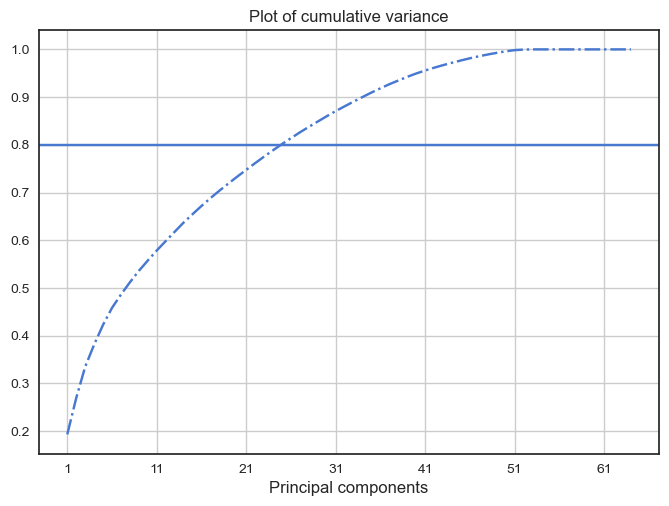

In [167]:
varplot(cumulVarExplained, "cumulative", h=0.8)

Elbow Method for PCA_df_nost


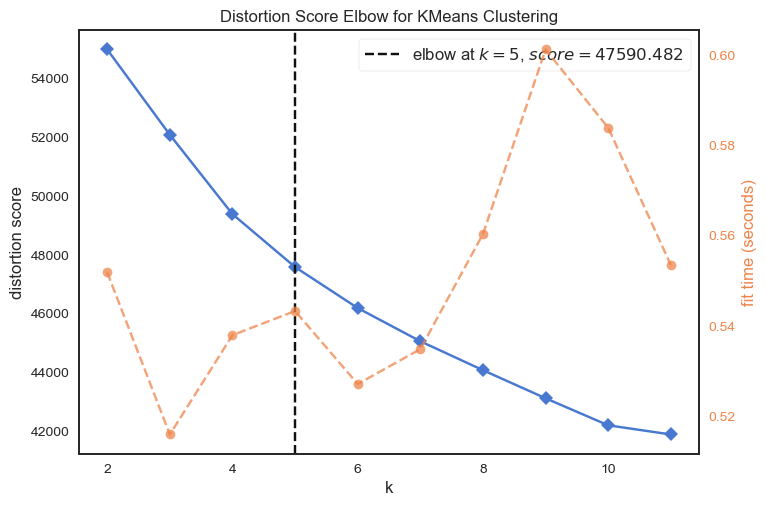

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [168]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pca = PCA(n_components=25, random_state = 22)
pca.fit(scaled_df_nost)
columns_list = ["col" + str(i) for i in range(1, 26)]
PCA_df_nost = pd.DataFrame(pca.transform(scaled_df_nost), columns=(columns_list))

#Смотрим сколько кластеров нужно брать
print('Elbow Method for PCA_df_nost')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(PCA_df_nost)
Elbow_M.show()

In [169]:
kmeans = KMeans(n_clusters=5, random_state=15)
cluster_kmeans = kmeans.fit_predict(PCA_df_nost)

PCA_df_nost["Clusters"] = cluster_kmeans
df_for_pca["Clusters"] = cluster_kmeans
df_hex_original["Clusters"] = cluster_kmeans

In [170]:
plot_colors = [
    '#ff99c8', 
    '#fcf6bd', 
    '#d0f4de', 
    '#a9def9', 
    '#e4c1f9'  
]

In [171]:
plot_colors = ['#1f77b4',  # Cluster 0: blue
               '#ff7f0e',  # Cluster 1: orange
               '#2ca02c',  # Cluster 2: green
               '#d62728',  # Cluster 3: red
               '#9467bd']  # Cluster 4: purple

In [172]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [173]:
#Функция для инфы ок кластере, смотрим на баланс и на средние значения
def clust_review(dataframe, condition_column, end_value):
    
    pl = sns.countplot(x=dataframe["Clusters"], palette = plot_colors)
    pl.set_title("Distribution Of The Clusters")
    plt.show()
    print(color.BOLD+"MEAN VALUE FOR EACH FEATURE"+color.END)
    mean_values_dict = {}
    count_values_dict = {}
    for condition_value in range(end_value + 1):
        filtered_df = dataframe[dataframe[condition_column] == condition_value]
        mean_values = filtered_df.mean()
        mean_values_dict[condition_value] = mean_values
        count_values_dict[condition_value] = len(filtered_df)
    result_df = pd.DataFrame(mean_values_dict).transpose()
    result_df.index.name = condition_column
    result_df = result_df.drop(condition_column, axis=1)
    result_df['Size of the clusters'] = pd.Series(count_values_dict)
    result_df = result_df.round(2)
    pd.set_option('display.max_columns', 180)
    return result_df

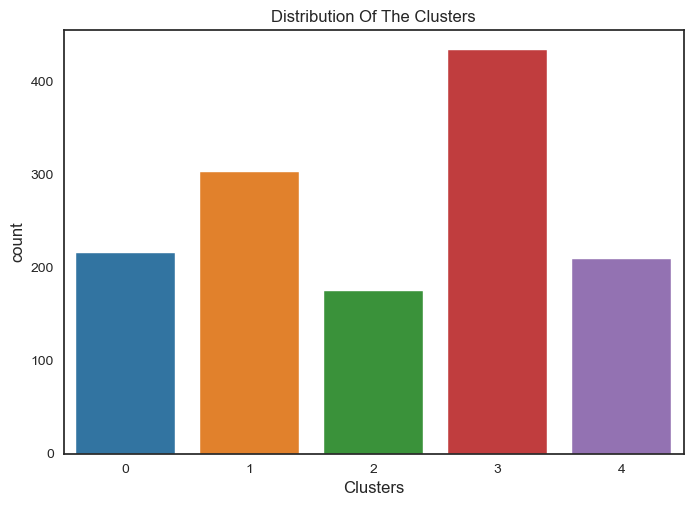

MEAN VALUE FOR EACH FEATURE


unique_visits  age_20_unique_share  age_20_30_unique_share  \
Clusters                                                               
0                141.91                 0.01                    0.15   
1                104.94                 0.01                    0.10   
2                153.19                 0.01                    0.13   
3                132.71                 0.01                    0.12   
4                 96.47                 0.01                    0.14   

          age_30_40_unique_share  age_40_60_unique_share  age_60_unique_share  \
Clusters                                                                        
0                           0.28                    0.42                 0.13   
1                           0.28                    0.44                 0.17   
2                           0.28                    0.43                 0.15   
3                           0.29                    0.43                 0.15   
4                           0.28                    0.44                 0.13   

          male_unique_share  female_unique_share  salary_1_unique_share  \
Clusters                                                                  
0                      0.54                 0.46                   0.17   
1                      0.53                 0.47                   0.20   
2                      0.52                 0.48                   0.19   
3                      0.54                 0.46                   0.19   
4                      0.59                 0.41                   0.16   

          salary_2_unique_share  salary_3_unique_share  salary_4_unique_share  \
Clusters                                                                        
0                          0.23                   0.22                   0.19   
1                          0.26                   0.23                   0.18   
2                          0.22                   0.22                   0.19   
3                          0.24                   0.23                   0.19   
4                          0.23                   0.22                   0.20   

          salary_5_unique_share  avg_duration_hrs  median_duration_hrs  \
Clusters                                                                 
0                          0.19              5.25                 2.45   
1                          0.14              7.07                 3.36   
2                          0.17              4.62                 2.10   
3                          0.15              5.43                 2.68   
4                          0.19              4.26                 2.09   

          weekday_visits_share  weekend_visits_share  Stay0_05h_share  \
Clusters                                                                
0                         0.64                  0.36              0.0   
1                         0.66                  0.34              0.0   
2                         0.66                  0.34              0.0   
3                         0.65                  0.35              0.0   
4                         0.61                  0.39              0.0   

          Stay05_1h_share  Stay1_3h_share  Stay3_6h_share  Stay6_9h_share  \
Clusters                                                                    
0                    0.06            0.52            0.17            0.09   
1                    0.04            0.44            0.17            0.11   
2                    0.06            0.58            0.15            0.08   
3                    0.07            0.47            0.17            0.11   
4                    0.07            0.58            0.17            0.08   

          Stay9_15h_share  Stay15_20h_share  Stay20_plus_share  Friday_share  \
Clusters                                                                       
0                    0.10              0.03               0.03          0.13   
1                    0.14       

In [174]:
clust_review(df_hex_original, 'Clusters', 4)

In [175]:
df_hex_original.head(3)

h3_9  unique_visits  age_20_unique_share  \
0  8911060006bffff             98             0.000000   
1  89110600077ffff             99             0.011111   
2  89110600113ffff            144             0.007299   

   age_20_30_unique_share  age_30_40_unique_share  age_40_60_unique_share  \
0                0.125000                0.302083                0.427083   
1                0.133333                0.288889                0.433333   
2                0.072993                0.372263                0.452555   

   age_60_unique_share  male_unique_share  female_unique_share  \
0             0.145833           0.653061             0.346939   
1             0.133333           0.696970             0.303030   
2             0.094891           0.638889             0.361111   

   salary_1_unique_share  salary_2_unique_share  salary_3_unique_share  \
0               0.341176               0.176471               0.141176   
1               0.229885               0.149425               0.229885   
2               0.325581               0.201550               0.170543   

   salary_4_unique_share  salary_5_unique_share  avg_duration_hrs  \
0               0.152941               0.188235          4.722789   
1               0.206897               0.183908          3.709160   
2               0.155039               0.147287          4.214955   

   median_duration_hrs  weekday_visits_share  weekend_visits_share  \
0                 2.23              0.734694              0.265306   
1                 1.81              0.744000              0.256000   
2                 1.72              0.639640              0.360360   

   Stay0_05h_share  Stay05_1h_share  Stay1_3h_share  Stay3_6h_share  \
0              0.0         0.068027        0.517007        0.129252   
1              0.0         0.088000        0.564000        0.176000   
2              0.0         0.084084        0.687688        0.117117   

   Stay6_9h_share  Stay9_15h_share  Stay15_20h_share  Stay20_plus_share  \
0        0.102041         0.142857          0.013605           0.027211   
1        0.068000         0.064000          0.036000           0.004000   
2        0.054054         0.027027          0.021021           0.009009   

   Friday_share  Monday_share  Saturday_share  Sunday_share  Thursday_share  \
0      0.251701      0.170068        0.163265      0.102041        0.081633   
1      0.144000      0.216000        0.124000      0.132000        0.136000   
2      0.138138      0.183183        0.186186      0.174174        0.108108   

   Tuesday_share  Wednesday_share  day_share  evening_share  morning_share  \
0       0.142857         0.088435   0.319728       0.272109       0.190476   
1       0.144000         0.104000   0.460000       0.216000       0.144000   
2       0.099099         0.111111   0.444444       0.153153       0.252252   

   night_share  avg_duration_hrs_per_unique  median_duration_hrs_per_unique  \
0     0.217687                     3.710017                            1.70   
1     0.180000                     2.982734                            1.39   
2     0.150150                     5.845619                            1.50   

   Stay0_05h_per_unique_share_per_unique  \
0                                    0.0   
1                                    0.0   
2                                    0.0   

   Stay05_1h_per_unique_share_per_unique  \
0                               0.081633   
1                               0.181818   
2                               0.138889   

   Stay1_3h_per_unique_share_per_unique  Stay3_6h_per_unique_share_per_unique  \
0                              0.581633                              0.132653   
1                              0.555556                              0.131313   
2                              0.645833                              0.097222   

   Stay6_9h_per_unique_share_per_unique  \
0                              0.091837   
1                              0.060606   
2          

## Make visualization

In [176]:
#pip install folium

In [177]:
df_hex_original[['h3_9', 'Clusters']]

h3_9  Clusters
0     8911060006bffff         2
1     89110600077ffff         2
2     89110600113ffff         2
3     8911060018fffff         2
4     8911060019bffff         4
...               ...       ...
1330  891106ab6b7ffff         2
1331  891106ab6bbffff         3
1332  891106ab6cbffff         2
1333  891106ab6d7ffff         1
1334  891106b98bbffff         1

[1335 rows x 2 columns]

In [178]:
import pandas as pd
import folium
from h3 import h3
import matplotlib.colors as mcolors

In [179]:
def hex_to_polygon(hex_id):
    geo_boundary = h3.h3_to_geo_boundary(hex_id, geo_json=True)
    return [(boundary[1], boundary[0]) for boundary in geo_boundary]  # Swap lat-lon to lon-lat for folium

# Initialize the map centered around Saint Petersburg.
map_center = [59.9343, 30.3351]  # Latitude and Longitude of Saint Petersburg
folium_map = folium.Map(location=map_center, zoom_start=12)

# Get a list of colors for the clusters.
num_clusters = df_hex_original['Clusters'].nunique()
colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for better visual distinction

# Plot the hexagons on the map with different colors for each cluster.
for index, row in df_hex_original.iterrows():
    polygon = hex_to_polygon(row['h3_9'])
    cluster_color = colors[row['Clusters'] % num_clusters]
    folium.Polygon(
        locations=polygon,
        fill=True,
        fill_color=cluster_color,
        color=cluster_color,
        fill_opacity=0.7,
        weight=2
    ).add_to(folium_map)

In [180]:
import branca

# Ensure the clusters are sorted in the cluster_to_color dictionary
sorted_clusters = sorted(df_hex_original['Clusters'].unique())
cluster_to_color = {cluster: colors[i % len(colors)] for i, cluster in enumerate(sorted_clusters)}

# HTML for the legend
legend_html = '''
<div style="position: absolute; top: 10px; right: 50px; width: 150px; height: auto; border:2px solid grey; z-index: 9999; background-color: white; padding: 10px; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2); font-size:14px; overflow: auto;">
<b>Cluster Legend</b><br>
<table style="margin-top: 10px;">
{}
</table>
</div>
'''

# Populate legend with color boxes and labels using a table for alignment.
legend_entries = ''
for cluster in sorted_clusters:
    color = cluster_to_color[cluster]
    legend_entries += '<tr><td><i style="background: {}; width: 20px; height: 20px; display: inline-block; margin-right: 5px;"></i></td><td>Cluster {}</td></tr>'.format(color, cluster)

# Combine the HTML for the legend and the entries.
legend_html = legend_html.format(legend_entries)

# Add the legend to the map.
folium_map.get_root().html.add_child(branca.element.Element(legend_html))



In [181]:
folium_map

In [182]:
folium_map.save('map_diploma_final.html')

## DBSCAN

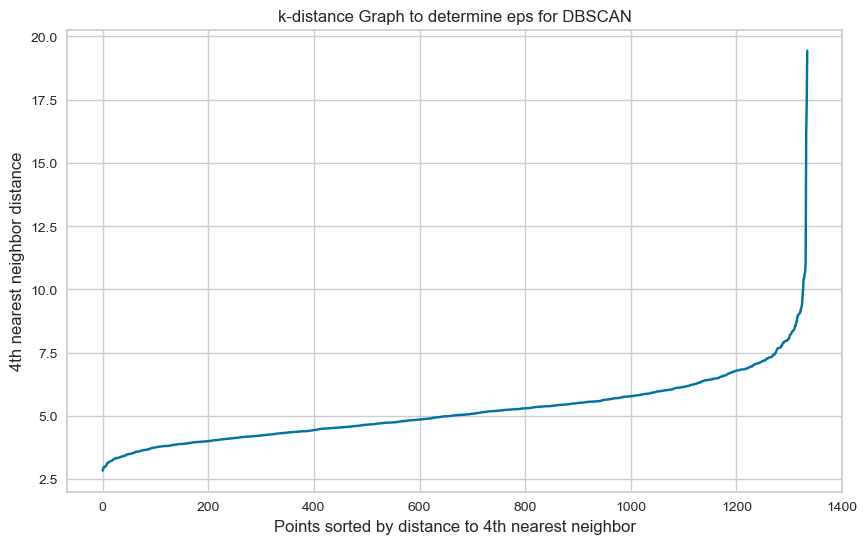

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
# Compute k-nearest neighbors
k = 4  # You can start with k=4 (which is min_samples)
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(PCA_df_nost)
distances, indices = nbrs.kneighbors(PCA_df_nost)

# Sort distances to the k-th nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance to {}th nearest neighbor'.format(k))
plt.ylabel('{}th nearest neighbor distance'.format(k))
plt.title('k-distance Graph to determine eps for DBSCAN')
plt.show()

## Запуск кластеризации на всем датасете Питера

In [62]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 70)

In [76]:
df_geo = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_geo_features_spb.csv')
df_time = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_time_based_features_full.csv')
df_hex_unique = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_unique_with_shares_spb.csv')
df_hex_total = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_total_with_shares_spb.csv')

In [77]:
df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((3905, 43), (3892, 63), (3892, 68), (3892, 68))

In [78]:
df_geo = df_geo.drop(columns=['name'])

In [79]:
df_model_short = pd.merge(df_hex_unique, df_time,
                                how='left', left_on='h3_9', right_on='h3_9')

In [80]:
df_model_short = pd.merge(df_model_short, df_geo,
                                how='left', left_on='h3_9', right_on='h3_9')

In [81]:
df_model_short.shape

(3892, 171)

In [82]:
df_model_short.head(3)

h3_9  unique_visits  car_owners_unique  carsharing_user_unique  \
0  8911060006bffff             98                 50                      12   
1  89110600077ffff             99                 53                      27   
2  89110600113ffff            144                 79                      31   

   not_citizen_rf_unique  healthy_food_inter_unique  \
0                     44                          3   
1                     48                          1   
2                     80                          4   

   public_trnsprt_user_unique  pharmacies_inter_unique  \
0                           4                       38   
1                           3                       42   
2                           5                       66   

   beauty_salon_inter_unique  elite_sports_inter_unique  \
0                          4                          1   
1                          1                          3   
2                          6                          1   

   sprtswr_ftwr_inter_unique  sprt_good_inter_unique  trvl_rus_unique  \
0                          1                       3               22   
1                          1                      10               27   
2                          0                      14               21   

   trvl_abrd_unique  sprt_fit_inter_unique  hunting_fishing_inter_unique  \
0                 4                      2                             2   
1                 8                      4                             5   
2                 3                      7                             4   

   fashion_inter_unique  coffee_inter_unique  med_serv_inter_unique  \
0                     5                    6                     14   
1                     4                   13                     17   
2                    17                   20                     32   

   education_inter_unique  delivery_inter_unique  markets_inter_unique  \
0                       8                     22                    41   
1                      15                     26                    48   
2                      28                     34                    66   

   no_children_unique  age_20_unique  age_20_30_unique  age_30_40_unique  \
0                  90              0                12                29   
1                  83              1                12                26   
2                 118              1                10                51   

   age_40_60_unique  age_60_unique  male_unique  female_unique  \
0                41             14           64             34   
1                39             12           69             30   
2                62             13           92             52   

   salary_1_unique  salary_2_unique  salary_3_unique  salary_4_unique  \
0               29               15               12               13   
1               20               13               20               18   
2               42               26               22               20   

   salary_5_unique  ...  dormitory_count  hotel_count  house_count  \
0               16  ...                0            0            0   
1               16  ...                0            0            0   
2               19  ...                0            0            0   

   semidetached_house_count  terrace_count  commercial_count  office_count  \
0                         0              0                 0             0   
1                         0              0                 0             0   
2                         0              0                 0             0   

   retail_count  train_station_count  bus_stop_count  crossing_count  \
0             0                    0               1               0   
1             2                    0               1               0   
2             0                    0               0               0   

   cafe_count  fast_food_count  restaurant_count  college_count  \
0        

## Clustering

In [83]:
#df_model_short = df_model_short.drop(columns=['age_count', 'gender_count', 'salary_count', 'visit_count'])
#df.set_index('h3_9', inplace=True)

In [84]:
all_columns = df_model_short.columns.to_list()
#all_columns

In [85]:
df_hex_original = df_model_short
#df_hex_original = pd.get_dummies(df_hex_original, columns=['name'])

In [86]:
#df_hex_original = df_hex_original.drop(columns=['Clusters'])

In [87]:
df_model_short.columns

Index(['h3_9', 'unique_visits', 'car_owners_unique', 'carsharing_user_unique',
       'not_citizen_rf_unique', 'healthy_food_inter_unique',
       'public_trnsprt_user_unique', 'pharmacies_inter_unique',
       'beauty_salon_inter_unique', 'elite_sports_inter_unique',
       ...
       'bench_count', 'amount_unqiue_vehicles', 'unique_vehicle_stops',
       'unique_stops', 'bus_stop_counter', 'tram_stop_counter',
       'trolleybus_stop_counter', 'unique_clubs_names', 'unique_clubs_sortes',
       'total_fit_clubs'],
      dtype='object', length=171)

In [88]:
df_for_pca = df_hex_original.drop(columns=['h3_9'])

In [89]:
scaler = StandardScaler()
scaler.fit(df_for_pca)
scaled_df_nost = pd.DataFrame(scaler.transform(df_for_pca),columns= df_for_pca.columns )

pca = PCA(n_components=None, random_state = 15).fit(scaled_df_nost)


varExplainedRatio = pca.explained_variance_ratio_
print(varExplainedRatio)
print()
cumulVarExplained = np.cumsum(varExplainedRatio)
cumulVarExplained

[3.15646821e-01 4.76937617e-02 4.28021552e-02 2.84635995e-02
 2.67452091e-02 1.98425891e-02 1.74982220e-02 1.59250454e-02
 1.51773875e-02 1.34376048e-02 1.29461663e-02 1.15648088e-02
 1.11442577e-02 1.06530126e-02 1.04301069e-02 9.99606021e-03
 9.44073066e-03 9.09137000e-03 8.72822789e-03 8.49263964e-03
 8.21078497e-03 8.12717464e-03 7.96401407e-03 7.82918536e-03
 7.74614519e-03 7.55907656e-03 7.38069231e-03 7.31195720e-03
 7.20305406e-03 7.05193455e-03 6.89443811e-03 6.81749749e-03
 6.69083559e-03 6.58588500e-03 6.50090184e-03 6.45627606e-03
 6.39008457e-03 6.29091565e-03 6.22609883e-03 6.08075332e-03
 6.03471778e-03 5.98891351e-03 5.86587850e-03 5.84439017e-03
 5.72761530e-03 5.69698152e-03 5.64432136e-03 5.52713502e-03
 5.45171891e-03 5.39792451e-03 5.28117801e-03 5.23312431e-03
 5.08778426e-03 4.98650189e-03 4.92762638e-03 4.81806025e-03
 4.74759743e-03 4.66456773e-03 4.59158722e-03 4.55376381e-03
 4.48874136e-03 4.42972401e-03 4.32342508e-03 3.99898433e-03
 3.91450385e-03 3.857770

array([0.31564682, 0.36334058, 0.40614274, 0.43460634, 0.46135155,
       0.48119414, 0.49869236, 0.5146174 , 0.52979479, 0.5432324 ,
       0.55617856, 0.56774337, 0.57888763, 0.58954064, 0.59997075,
       0.60996681, 0.61940754, 0.62849891, 0.63722714, 0.64571978,
       0.65393056, 0.66205774, 0.67002175, 0.67785093, 0.68559708,
       0.69315616, 0.70053685, 0.70784881, 0.71505186, 0.72210379,
       0.72899823, 0.73581573, 0.74250657, 0.74909245, 0.75559335,
       0.76204963, 0.76843971, 0.77473063, 0.78095673, 0.78703748,
       0.7930722 , 0.79906111, 0.80492699, 0.81077138, 0.816499  ,
       0.82219598, 0.8278403 , 0.83336743, 0.83881915, 0.84421708,
       0.84949826, 0.85473138, 0.85981916, 0.86480567, 0.86973329,
       0.87455135, 0.87929895, 0.88396352, 0.88855511, 0.89310887,
       0.89759761, 0.90202733, 0.90635076, 0.91034974, 0.91426425,
       0.91812202, 0.92185804, 0.92554371, 0.92909074, 0.93248337,
       0.93582701, 0.93908071, 0.94223568, 0.94519118, 0.94804

In [90]:
def varplot(x, label, h=0):
    plt.plot(range(len(x)), x, linestyle="-.")
    plt.title('Plot of '+ label + ' variance')
    plt.xticks(range(len(x)), [y+1 for y in range(len(x))])
    plt.xlabel('Principal components')
    plt.axhline(h)
    plt.grid()
    plt.xticks(np.arange(0, 200, step=10))
    plt.show()

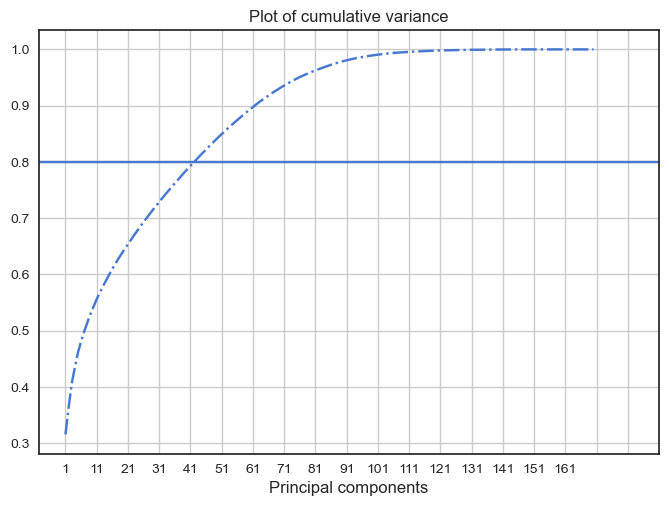

In [91]:
varplot(cumulVarExplained, "cumulative", h=0.8)

Elbow Method for PCA_df_nost


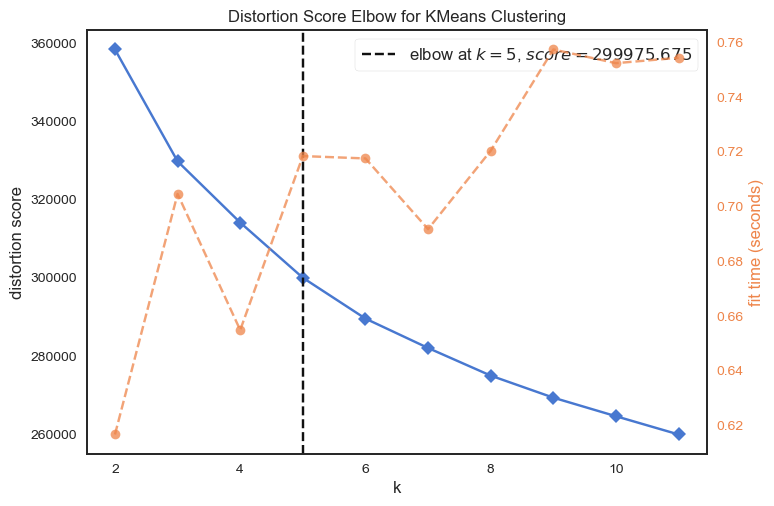

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pca = PCA(n_components=40, random_state = 14)
pca.fit(scaled_df_nost)
columns_list = ["col" + str(i) for i in range(1, 41)]
PCA_df_nost = pd.DataFrame(pca.transform(scaled_df_nost), columns=(columns_list))

#Смотрим сколько кластеров нужно брать
print('Elbow Method for PCA_df_nost')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(PCA_df_nost)
Elbow_M.show()

In [93]:
kmeans = KMeans(n_clusters=5, random_state=15)
cluster_kmeans = kmeans.fit_predict(PCA_df_nost)

PCA_df_nost["Clusters"] = cluster_kmeans
df_for_pca["Clusters"] = cluster_kmeans
df_hex_original["Clusters"] = cluster_kmeans

In [94]:
plot_colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']

In [95]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [96]:
#Функция для инфы ок кластере, смотрим на баланс и на средние значения
def clust_review(dataframe, condition_column, end_value):
    
    pl = sns.countplot(x=dataframe["Clusters"], palette = plot_colors)
    pl.set_title("Distribution Of The Clusters")
    plt.show()
    print(color.BOLD+"MEAN VALUE FOR EACH FEATURE"+color.END)
    mean_values_dict = {}
    count_values_dict = {}
    for condition_value in range(end_value + 1):
        filtered_df = dataframe[dataframe[condition_column] == condition_value]
        mean_values = filtered_df.mean()
        mean_values_dict[condition_value] = mean_values
        count_values_dict[condition_value] = len(filtered_df)
    result_df = pd.DataFrame(mean_values_dict).transpose()
    result_df.index.name = condition_column
    result_df = result_df.drop(condition_column, axis=1)
    result_df['Size of the clusters'] = pd.Series(count_values_dict)
    result_df = result_df.round(2)
    pd.set_option('display.max_columns', 30)
    return result_df

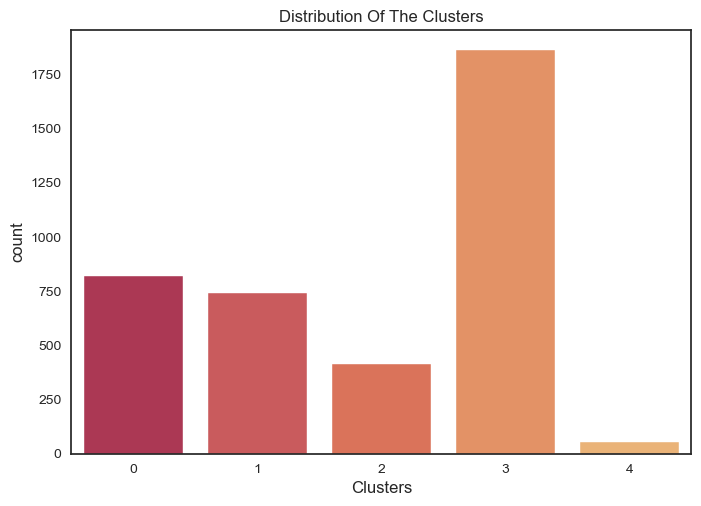

MEAN VALUE FOR EACH FEATURE


unique_visits  car_owners_unique  carsharing_user_unique  \
Clusters                                                             
0                 12.37               3.63                    1.31   
1                 93.03              45.04                   18.61   
2                174.00              81.86                   30.70   
3                 13.21               5.43                    2.20   
4                363.30             168.62                   74.54   

          not_citizen_rf_unique  healthy_food_inter_unique  \
Clusters                                                     
0                          5.82                       0.30   
1                         48.09                       3.11   
2                         89.32                       4.86   
3                          6.55                       0.33   
4                        188.30                      12.95   

          public_trnsprt_user_unique  pharmacies_inter_unique  \
Clusters                                                        
0                               0.34                     4.33   
1                               4.49                    46.77   
2                               7.17                    87.55   
3                               0.53                     6.02   
4                              21.21                   186.30   

          beauty_salon_inter_unique  elite_sports_inter_unique  \
Clusters                                                         
0                              0.29                       0.06   
1                              4.09                       1.21   
2                              7.16                       1.79   
3                              0.45                       0.13   
4                             18.23                       4.77   

          sprtswr_ftwr_inter_unique  sprt_good_inter_unique  trvl_rus_unique  \
Clusters                                                                       
0                              0.06                    0.91             1.13   
1                              0.89                   11.45            12.57   
2                              1.58                   21.24            21.93   
3                              0.11                    1.46             1.56   
4                              3.84                   45.32            59.11   

          trvl_abrd_unique  sprt_fit_inter_unique  \
Clusters                                            
0                     0.21                   0.24   
1                     2.56                   3.40   
2                     4.36                   5.85   
3                     0.32                   0.37   
4                    14.54                  13.79   

          hunting_fishing_inter_unique  ...  hospital_count  pharmacy_count  \
Clusters                                ...                                   
0                                 0.14  ...            0.02            0.38   
1                                 2.34  ...            0.03            0.57   
2                                 3.95  ...            0.04            0.82   
3                                 0.27  ...            0.03            0.31   
4                                 7.41  ...            0.05            2.09   

          theatre_count  townhall_count  bench_count  amount_unqiue_vehicles  \
Clusters                                                                       
0                  0.02            0.01         3.87                    0.84   
1                  0.05            0.01         4.02                    0.95   
2                  0.02            0.01         3.00                    0.97   
3                  0.02            0.01         3.01                    0.65   
4                  0.32            0.00         8.11                    1.84   

          unique_vehicle_stops  unique_stops  bus_stop_counter  \
Clusters                                           

In [97]:
clust_review(df_hex_original, 'Clusters', 4)

In [98]:
df_hex_original.head(3)

h3_9  unique_visits  car_owners_unique  carsharing_user_unique  \
0  8911060006bffff             98                 50                      12   
1  89110600077ffff             99                 53                      27   
2  89110600113ffff            144                 79                      31   

   not_citizen_rf_unique  healthy_food_inter_unique  \
0                     44                          3   
1                     48                          1   
2                     80                          4   

   public_trnsprt_user_unique  pharmacies_inter_unique  \
0                           4                       38   
1                           3                       42   
2                           5                       66   

   beauty_salon_inter_unique  elite_sports_inter_unique  \
0                          4                          1   
1                          1                          3   
2                          6                          1   

   sprtswr_ftwr_inter_unique  sprt_good_inter_unique  trvl_rus_unique  \
0                          1                       3               22   
1                          1                      10               27   
2                          0                      14               21   

   trvl_abrd_unique  sprt_fit_inter_unique  ...  hospital_count  \
0                 4                      2  ...               0   
1                 8                      4  ...               0   
2                 3                      7  ...               0   

   pharmacy_count  theatre_count  townhall_count  bench_count  \
0               0              0               0            0   
1               0              0               0            0   
2               0              0               0            0   

   amount_unqiue_vehicles  unique_vehicle_stops  unique_stops  \
0                     1.0                   1.0           1.0   
1                     0.0                   0.0           0.0   
2                     0.0                   0.0           0.0   

   bus_stop_counter  tram_stop_counter  trolleybus_stop_counter  \
0               1.0                0.0                      0.0   
1               0.0                0.0                      0.0   
2               0.0                0.0                      0.0   

   unique_clubs_names  unique_clubs_sortes  total_fit_clubs  Clusters  
0                 0.0                  0.0              0.0         1  
1                 0.0                  0.0              0.0         1  
2                 4.0                  3.0              4.0         1  

[3 rows x 172 columns]

## Make visualization

In [101]:
df_hex_original[['h3_9', 'Clusters']]

h3_9  Clusters
0     8911060006bffff         1
1     89110600077ffff         1
2     89110600113ffff         1
3     89110600127ffff         3
4     89110600183ffff         3
...               ...       ...
3887  891106b9e4fffff         0
3888  891106b9e6bffff         3
3889  891106b9e6fffff         3
3890  891106b9e77ffff         3
3891  891106b9e7bffff         3

[3892 rows x 2 columns]

In [102]:
import pandas as pd
import folium
from h3 import h3
import matplotlib.colors as mcolors

In [106]:
def hex_to_polygon(hex_id):
    geo_boundary = h3.h3_to_geo_boundary(hex_id, geo_json=True)
    return [(boundary[1], boundary[0]) for boundary in geo_boundary]  # Swap lat-lon to lon-lat for folium

# Initialize the map centered around Saint Petersburg.
map_center = [59.9343, 30.3351]  # Latitude and Longitude of Saint Petersburg
folium_map = folium.Map(location=map_center, zoom_start=12)

# Get a list of colors for the clusters.
num_clusters = df_hex_original['Clusters'].nunique()
colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for better visual distinction

# Plot the hexagons on the map with different colors for each cluster.
for index, row in df_hex_original.iterrows():
    polygon = hex_to_polygon(row['h3_9'])
    cluster_color = colors[row['Clusters'] % num_clusters]
    folium.Polygon(
        locations=polygon,
        fill=True,
        fill_color=cluster_color,
        color=cluster_color,
        fill_opacity=0.7,
        weight=2
    ).add_to(folium_map)

In [107]:
import branca

cluster_to_color = {cluster: color for cluster, color in zip(df_hex_original['Clusters'].unique(), colors)}


legend_html = '''
<div style="position: absolute; top: 10px; right: 50px; border:2px solid grey; z-index: 9999; background-color: white; padding: 10px; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
<b>Cluster Legend</b><br>
{}
</div>
'''

# Populate legend with color boxes and labels.
legend_entries = ''
for cluster, color in cluster_to_color.items():
    legend_entries += '<i style="background: {}; width: 18px; height: 18px; float: left; margin-right: 8px; margin-bottom: 2px;"></i> Cluster {}<br>'.format(color, cluster)

# Combine the HTML for the legend and the entries.
legend_html = legend_html.format(legend_entries)

# Add the legend to the map.
folium_map.get_root().html.add_child(branca.element.Element(legend_html))


In [108]:
folium_map